In [ ]:
VERSION

In [ ]:
# import Pkg;
# Pkg.add("Distances")
# Pkg.add("Plots")
# Pkg.add("LinearAlgebra")

In [15]:
using Distances 
using Plots
using LinearAlgebra

### Project 1 for PHYS 619 at Texas A&M University taught by Prof Siu A. Chin
The goal of this project is to compute and visualize Keplerian orbits using both an exact analytical solution and 4 numerical integration methods: Euler-Cromer, Newton, second order Runge-Kutta (RK2), and the position verlet algorithms. We compare numerical trajectories tagainst the exact ellipse and evaluate each method's ability to conserve energy and angular momentum over multiple orbital periods. 


In [16]:
# Initializing variables
x0 = 10
v0  = 1/10
h = x0 * v0
p = h^2
E0 = .5 * v0^2 - (1/x0)
a = -1/(2*E0)
P = 2 * pi * a^(3/2)
e = (1 - p/a)^(1/2)
r::Vector{Float64} = [x0, 0]
v = [0, v0]

2-element Vector{Float64}:
 0.0
 0.1

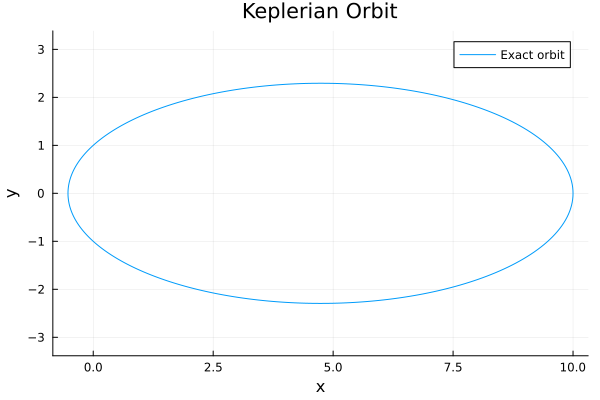

In [17]:
# Plot for the exact trajectory
θ = range(0, 2π, length=1000)
r = p ./ (1 .- e .* cos.(θ))
exact_x = r .* cos.(θ)
exact_y = r .* sin.(θ)

#Plot
plot(exact_x, exact_y, aspect_ratio=:equal, label="Exact orbit", xlabel="x", ylabel="y", title="Keplerian Orbit")
# scatter!([0],[0], label = "Star", color=:yellow, markersize=10)

In [18]:
# function to calculate energy
function Energy(x, v)
    return 0.5 * norm(v)^2 - 1/norm(x)
end


# calculate the acceleration 
function acc(x)
    r = norm(x)
    return -x ./ r^3
end

#calculates the angular momentum
function L(x ,v)
    return x[1] * v[2] - x[2] * v[1]
end

println("E0 = ", Energy([x0, 0.0], [0.0, v0]))

E0 = -0.095


In [ ]:
# Intergrators
#Cromer
function cromerStep(x, v, dt)
    a = acc(x)           
    v_new = v + a * dt
    x_new = x + v_new * dt
    return x_new, v_new
end

#Newton
function newtonStep(x, v, dt)
    a = acc(x)
    x_new = x + v * dt       
    v_new = v + a * dt
    return x_new, v_new
end

# Second-order Runge-Kutta 
function rk2Step(x, v, dt)
    # Half step to get midpoint state
    a1 = acc(x)
    x_mid = x + v * dt/2
    v_mid = v + a1 * dt/2
    
    # Full step using midpoint state
    a_mid = acc(x_mid)
    x_new = x + v_mid * dt
    v_new = v + a_mid * dt
    return x_new, v_new
end

# Position Verlet
function verletStep(x, x_prev, dt)
    a = acc(x)
    x_new = 2 .* x - x_prev + a * dt^2
    v = (x_new - x_prev) / (2 * dt)    
    return x_new, v
end

verletStep (generic function with 1 method)

In [20]:
# Setup
dt     = P / 500
nsteps = 5 * 500


2500

In [ ]:
# Cromer
x_cromer = zeros(nsteps, 2);  v_cromer = zeros(nsteps, 2)
E_cromer = zeros(nsteps);     L_cromer = zeros(nsteps)
x_cromer[1, :] = [x0, 0.0];  v_cromer[1, :] = [0.0, v0]
E_cromer[1] = Energy(x_cromer[1, :], v_cromer[1, :])
L_cromer[1] = L(x_cromer[1, :], v_cromer[1, :])

for i in 2:nsteps
    x_cromer[i, :], v_cromer[i, :] = cromerStep(x_cromer[i-1, :], v_cromer[i-1, :], dt)
    E_cromer[i] = Energy(x_cromer[i, :], v_cromer[i, :])
    L_cromer[i] = L(x_cromer[i, :], v_cromer[i, :])
end

# Newton
x_newton = zeros(nsteps, 2);  v_newton = zeros(nsteps, 2)
E_newton = zeros(nsteps);     L_newton = zeros(nsteps)
x_newton[1, :] = [x0, 0.0];  v_newton[1, :] = [0.0, v0]
E_newton[1] = Energy(x_newton[1, :], v_newton[1, :])
L_newton[1] = L(x_newton[1, :], v_newton[1, :])

for i in 2:nsteps
    x_newton[i, :], v_newton[i, :] = newtonStep(x_newton[i-1, :], v_newton[i-1, :], dt)
    E_newton[i] = Energy(x_newton[i, :], v_newton[i, :])
    L_newton[i] = L(x_newton[i, :], v_newton[i, :])
end

# RK2
x_rk2 = zeros(nsteps, 2);  v_rk2 = zeros(nsteps, 2)
E_rk2 = zeros(nsteps);     L_rk2 = zeros(nsteps)
x_rk2[1, :] = [x0, 0.0];  v_rk2[1, :] = [0.0, v0]
E_rk2[1] = Energy(x_rk2[1, :], v_rk2[1, :])
L_rk2[1] = L(x_rk2[1, :], v_rk2[1, :])

for i in 2:nsteps
    x_rk2[i, :], v_rk2[i, :] = rk2Step(x_rk2[i-1, :], v_rk2[i-1, :], dt)
    E_rk2[i] = Energy(x_rk2[i, :], v_rk2[i, :])
    L_rk2[i] = L(x_rk2[i, :], v_rk2[i, :])
end

# Verlet
x_verlet = zeros(nsteps, 2);  v_verlet = zeros(nsteps, 2)
E_verlet = zeros(nsteps);     L_verlet = zeros(nsteps)
x_verlet[1, :] = [x0, 0.0];  v_verlet[1, :] = [0.0, v0]
E_verlet[1] = Energy(x_verlet[1, :], v_verlet[1, :])
L_verlet[1] = L(x_verlet[1, :], v_verlet[1, :])

a_init = acc(x_verlet[1, :])
x_verlet[2, :] = x_verlet[1, :] + v_verlet[1, :] * dt + 0.5 * a_init * dt^2

for i in 3:nsteps
    x_verlet[i, :], v_verlet[i, :] = verletStep(x_verlet[i-1, :], x_verlet[i-2, :], dt)
    E_verlet[i] = Energy(x_verlet[i, :], v_verlet[i, :])
    L_verlet[i] = L(x_verlet[i, :], v_verlet[i, :])
end


v_verlet[2, :] = (x_verlet[3, :] - x_verlet[1, :]) / (2 * dt)
E_verlet[2] = Energy(x_verlet[2, :], v_verlet[2, :])
L_verlet[2] = L(x_verlet[2, :], v_verlet[2, :])

0.9999999999999999

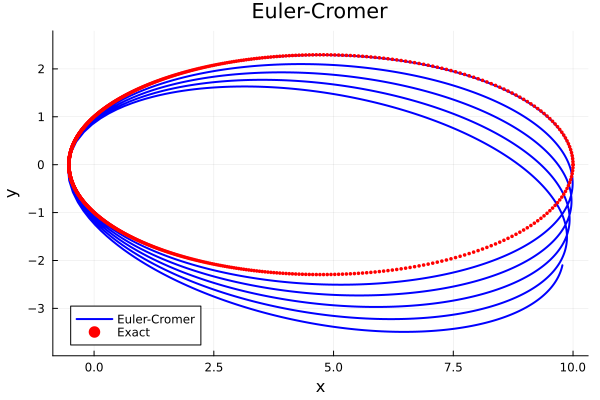

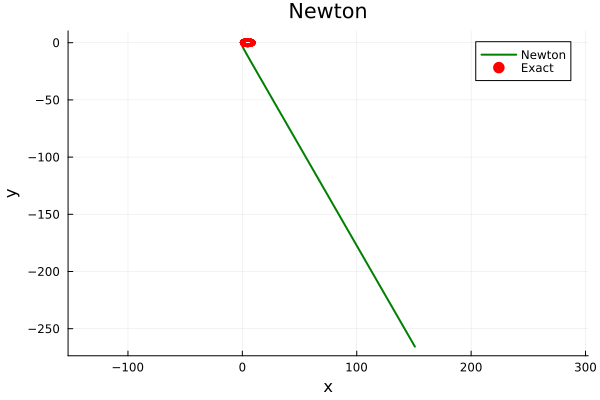

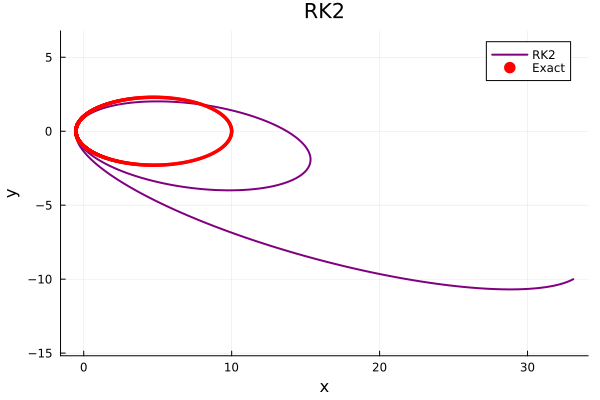

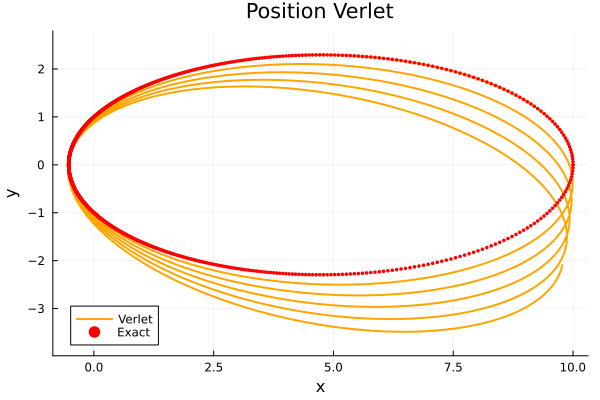

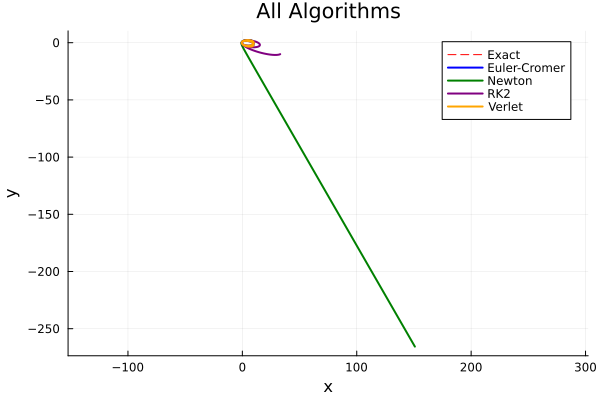

In [ ]:
# Exact orbit for overlay
θ = range(0, 2π, length=1000)
r_exact = p ./ (1 .- e .* cos.(θ))
x_exact = r_exact .* cos.(θ)
y_exact = r_exact .* sin.(θ)



p1 = plot(x_cromer[:, 1], x_cromer[:, 2],
          label="Euler-Cromer", lw=2, color=:blue,
          xlabel="x", ylabel="y", title="Euler-Cromer",
          aspect_ratio=:equal)
scatter!(p1, x_exact, y_exact, label="Exact", markersize=2,
         markerstrokewidth=0, color=:red)

p2 = plot(x_newton[:, 1], x_newton[:, 2],
          label="Newton", lw=2, color=:green,
          xlabel="x", ylabel="y", title="Newton",
          aspect_ratio=:equal)
scatter!(p2, x_exact, y_exact, label="Exact", markersize=2,
         markerstrokewidth=0, color=:red)

p3 = plot(x_rk2[:, 1], x_rk2[:, 2],
          label="RK2", lw=2, color=:purple,
          xlabel="x", ylabel="y", title="RK2",
          aspect_ratio=:equal)
scatter!(p3, x_exact, y_exact, label="Exact", markersize=2,
         markerstrokewidth=0, color=:red)

p4 = plot(x_verlet[:, 1], x_verlet[:, 2],
          label="Verlet", lw=2, color=:orange,
          xlabel="x", ylabel="y", title="Position Verlet",
          aspect_ratio=:equal)
scatter!(p4, x_exact, y_exact, label="Exact", markersize=2,
         markerstrokewidth=0, color=:red)



p5 = plot(x_exact, y_exact,
          label="Exact", lw=1, color=:red, ls=:dash,
          xlabel="x", ylabel="y", title="All Algorithms",
          aspect_ratio=:equal)
plot!(p5, x_cromer[:, 1], x_cromer[:, 2], label="Euler-Cromer", lw=2, color=:blue)
plot!(p5, x_newton[:, 1], x_newton[:, 2], label="Newton",       lw=2, color=:green)
plot!(p5, x_rk2[:, 1],    x_rk2[:, 2],    label="RK2",          lw=2, color=:purple)
plot!(p5, x_verlet[:, 1], x_verlet[:, 2], label="Verlet",       lw=2, color=:orange)



display(p1)
display(p2)
display(p3)
display(p4)
display(p5)

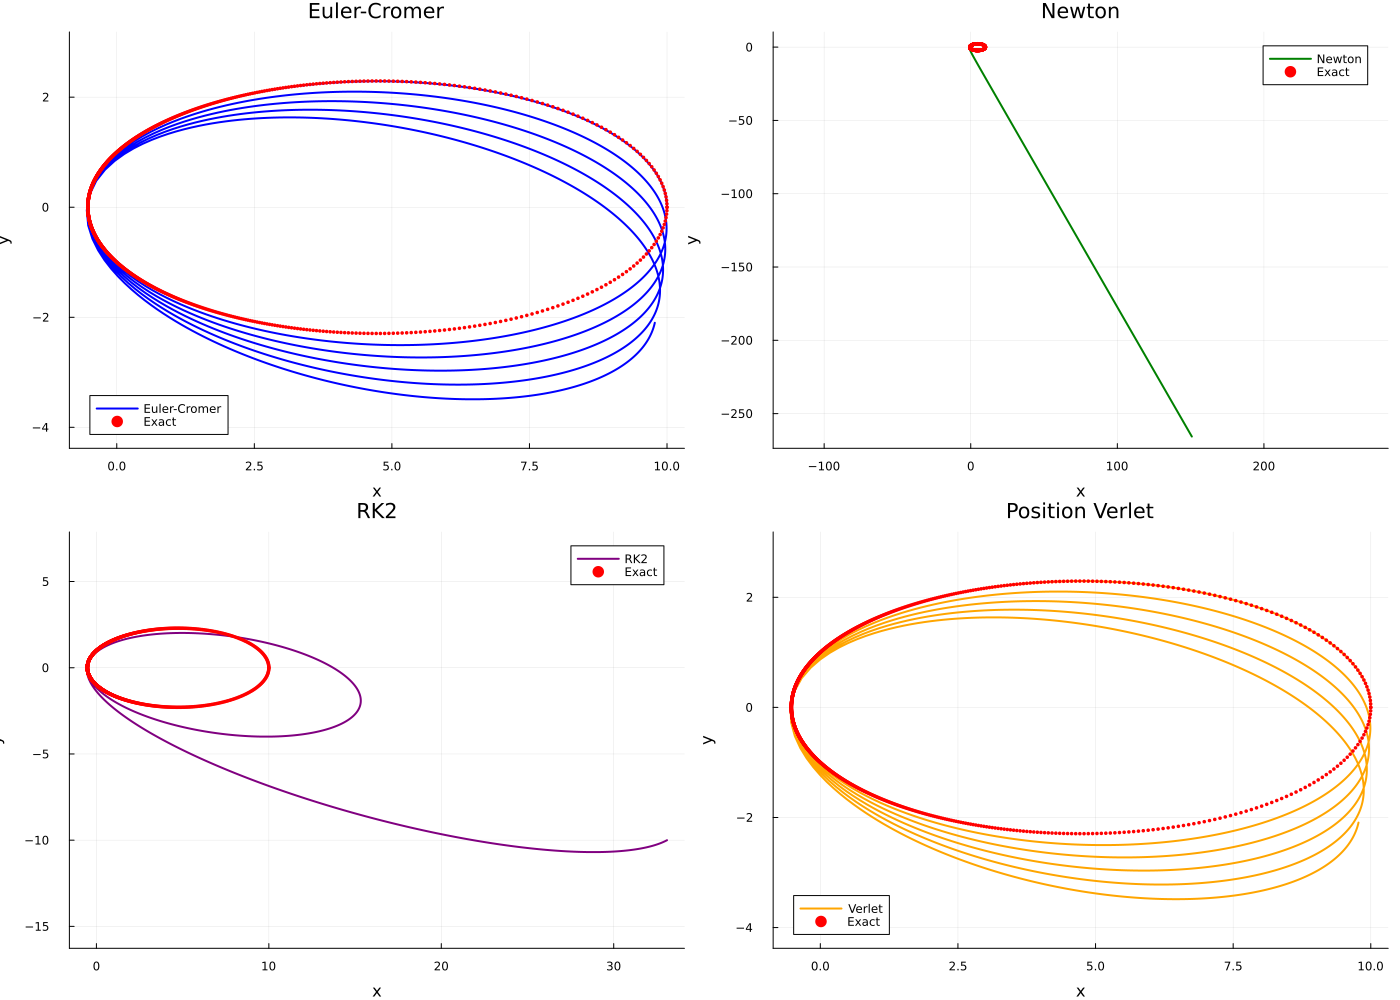

In [27]:
plot(p1, p2, p3, p4, layout=(2,2), size=(1400, 1000))

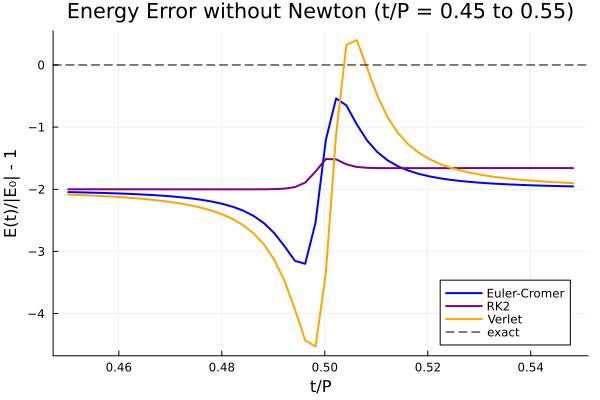

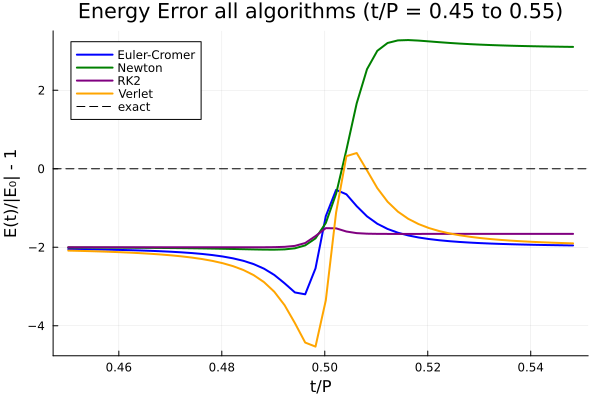

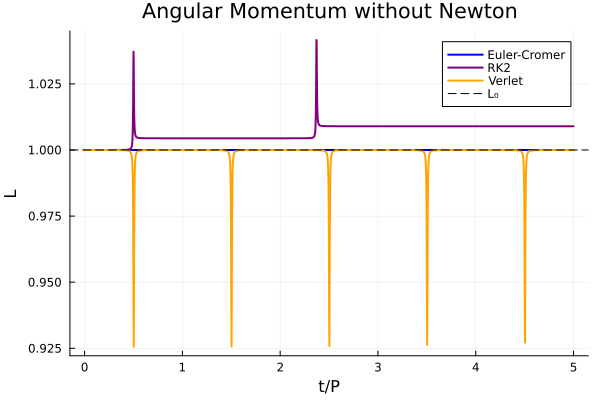

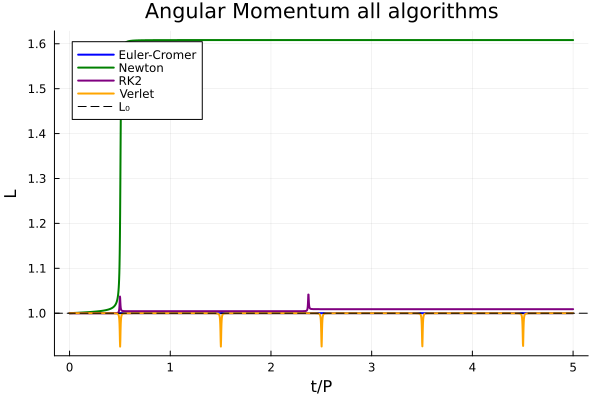

In [ ]:
t = range(0, 5, length=nsteps)
mask = 0.45 .≤ t .≤ 0.55

#  Energy error: without Newton 
p_energy_zoom = plot(t[mask], E_cromer[mask] ./ abs(E0) .- 1,
                     label="Euler-Cromer", lw=2, color=:blue,
                     xlabel="t/P", ylabel="E(t)/|E₀| - 1",
                     title="Energy Error without Newton (t/P = 0.45 to 0.55)")
plot!(p_energy_zoom, t[mask], E_rk2[mask]    ./ abs(E0) .- 1, label="RK2",    lw=2, color=:purple)
plot!(p_energy_zoom, t[mask], E_verlet[mask] ./ abs(E0) .- 1, label="Verlet", lw=2, color=:orange)
hline!(p_energy_zoom, [0.0], color=:black, ls=:dash, label="exact")

# Energy error: all four 
p_energy_full = plot(t[mask], E_cromer[mask] ./ abs(E0) .- 1,
                     label="Euler-Cromer", lw=2, color=:blue,
                     xlabel="t/P", ylabel="E(t)/|E₀| - 1",
                     title="Energy Error all algorithms (t/P = 0.45 to 0.55)")
plot!(p_energy_full, t[mask], E_newton[mask] ./ abs(E0) .- 1, label="Newton",  lw=2, color=:green)
plot!(p_energy_full, t[mask], E_rk2[mask]    ./ abs(E0) .- 1, label="RK2",     lw=2, color=:purple)
plot!(p_energy_full, t[mask], E_verlet[mask] ./ abs(E0) .- 1, label="Verlet",  lw=2, color=:orange)
hline!(p_energy_full, [0.0], color=:black, ls=:dash, label="exact")

#Angular momentum: without Newton
p_angular_zoom = plot(t, L_cromer,
                      label="Euler-Cromer", lw=2, color=:blue,
                      xlabel="t/P", ylabel="L",
                      title="Angular Momentum without Newton")
plot!(p_angular_zoom, t, L_rk2,    label="RK2",    lw=2, color=:purple)
plot!(p_angular_zoom, t, L_verlet, label="Verlet",  lw=2, color=:orange)
hline!(p_angular_zoom, [L_cromer[1]], color=:black, ls=:dash, label="L₀")

#  Angular momentum: all four 
p_angular_full = plot(t, L_cromer,
                      label="Euler-Cromer", lw=2, color=:blue,
                      xlabel="t/P", ylabel="L",
                      title="Angular Momentum all algorithms")
plot!(p_angular_full, t, L_newton, label="Newton",  lw=2, color=:green)
plot!(p_angular_full, t, L_rk2,    label="RK2",     lw=2, color=:purple)
plot!(p_angular_full, t, L_verlet, label="Verlet",  lw=2, color=:orange)
hline!(p_angular_full, [L_cromer[1]], color=:black, ls=:dash, label="L₀")

display(p_energy_zoom)
display(p_energy_full)
display(p_angular_zoom)
display(p_angular_full)